<a href="https://colab.research.google.com/github/jaayg23/workshop_PDI/blob/main/comparativa_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1

Notebook Clasificación

In [2]:
#Packages:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.datasets import cifar10

#Packages from optimizing the model:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Model, layers, regularizers

#Load the data:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

x_train=x_train.astype("float32")
# There was a normalization applied to x_test here, but not x_train yet.
# It's better to normalize both after splitting.
x_test=x_test.astype("float32")

# Binarizing the labels:
# Apply to_categorical only once to the original y_train and y_test
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10) # This is the y_test we want to use for validation later

# Normalizing the data after loading but before splitting train/val
# This ensures the mean and std are calculated on the full training set
mean = np.mean(x_train)
sd = np.std(x_train)
# I add a very samll number in the denominator for if the sd=0
x_train = (x_train - mean) / (sd + 1e-7)
x_test = (x_test - mean) / (sd + 1e-7)

#Train_test_val_split:
# Split the preprocessed x_train and y_train
x_valid = x_train[:5000]
y_valid = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]


x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

datagen=ImageDataGenerator(rotation_range=15,
                   width_shift_range=0.1,
                   height_shift_range=0.1,
                   horizontal_flip=True,
                   vertical_flip=True
                   )

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## ResNet

In [3]:
import tensorflow as tf

# Usar ResNet50 con pesos preentrenados
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = True

model_resnet = Sequential([
    base_model,
    Conv2D(512, (3,3), padding="same"),
    Conv2D(128, (3,3), padding="same"),
    Conv2D(32, (3,3), padding="same"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model_resnet.compile(optimizer="adam",
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Use the correctly preprocessed y_test here for validation data
history=model_resnet.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=126)

Epoch 1/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 116s 152ms/step - accuracy: 0.5102 - loss: 1.4820 - val_accuracy: 0.1876 - val_loss: 2.7536
Epoch 2/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.7257 - loss: 0.8627 - val_accuracy: 0.6565 - val_loss: 1.1567
Epoch 3/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.7004 - loss: 0.9491 - val_accuracy: 0.7021 - val_loss: 0.9720
Epoch 4/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.7426 - loss: 0.7865 - val_accuracy: 0.4990 - val_loss: 1.8028
Epoch 5/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.6819 - loss: 0.9612 - val_accuracy: 0.6940 - val_loss: 0.9273
Epoch 6/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.7241 - loss: 0.8433 - val_accuracy: 0.6677 - val_loss: 0.9985
Epoch 7/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.7417 - loss: 0.7620 - val_accuracy: 0.7576 - val_loss: 0.7464
Epoch 8/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8235 - loss: 0.5466 

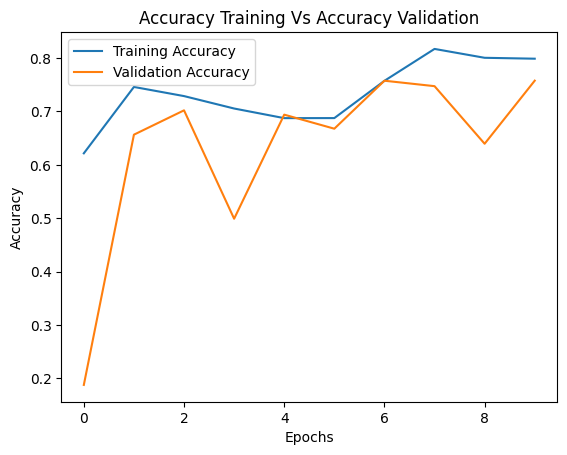

In [4]:
#Plotting the accuracy:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Training Vs Accuracy Validation")
plt.legend(loc="best")
plt.show()

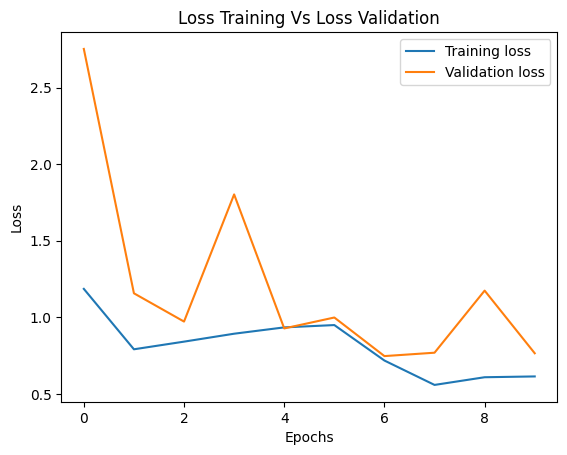

In [5]:
#Plotting the loss:
plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Training Vs Loss Validation")
plt.legend(loc="best")

In [6]:
model_resnet.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7623 - loss: 0.7589


[0.7648905515670776, 0.7577000260353088]

## EfficientNet

In [7]:
base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = True

model_eff = Sequential([
    base_model,
    Conv2D(512, (3,3), padding="same"),
    Conv2D(128, (3,3), padding="same"),
    Conv2D(32, (3,3), padding="same"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model_eff.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Use the correctly preprocessed y_test here for validation data
history1=model_eff.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=126)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 132s 161ms/step - accuracy: 0.4605 - loss: 1.5778 - val_accuracy: 0.1494 - val_loss: 4.0452
Epoch 2/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 60s 30ms/step - accuracy: 0.7363 - loss: 0.7906 - val_accuracy: 0.3946 - val_loss: 2.1615
Epoch 3/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.8008 - loss: 0.5948 - val_accuracy: 0.3677 - val_loss: 2.3527
Epoch 4/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.8356 - loss: 0.4974 - val_accuracy: 0.2593 - val_loss: 2.7793
Epoch 5/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.8543 - loss: 0.4400 - val_accuracy: 0.1888 - val_loss: 3.5655
Epoch 6/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.8699 - loss: 0.3924 - val_accuracy: 0.1341 - val_loss: 4.5209
Epoch 7/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.8916 - loss: 0.3323 - val_accuracy: 0.1908 - val_loss: 3.2744
Epoch 8/10
358/358 ━━━━━━━━━━━━━━━━━━

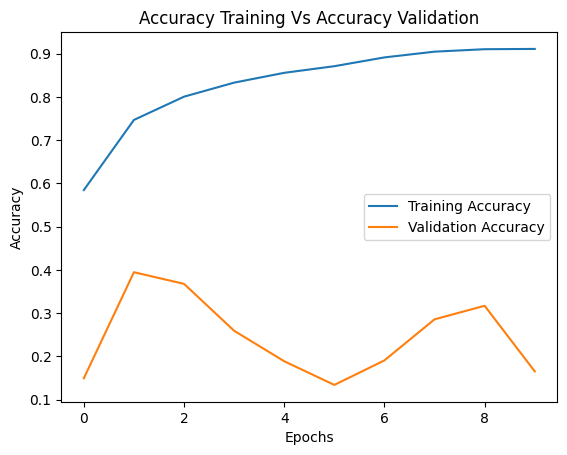

In [8]:
#Plotting the accuracy:
plt.plot(history1.history["accuracy"],label="Training Accuracy")
plt.plot(history1.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Training Vs Accuracy Validation")
plt.legend(loc="best")

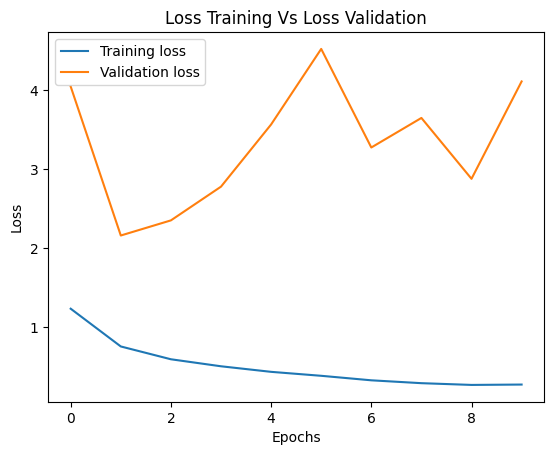

In [9]:
#Plotting the loss:
plt.plot(history1.history["loss"],label="Training loss")
plt.plot(history1.history["val_loss"],label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Training Vs Loss Validation")
plt.legend(loc="best")

In [10]:
model_eff.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.1670 - loss: 4.1041


[4.1096062660217285, 0.1655000001192093]

## VGG

In [12]:

base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = True

model_vgg = Sequential([
    base_model,
    Conv2D(512, (3,3), padding="same"),
    Conv2D(128, (3,3), padding="same"),
    Conv2D(32, (3,3), padding="same"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model_vgg.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Use the correctly preprocessed y_test here for validation data
history2=model_vgg.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=126)

Epoch 1/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 58s 123ms/step - accuracy: 0.1220 - loss: 2.2412 - val_accuracy: 0.2254 - val_loss: 1.8922
Epoch 2/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 29s 81ms/step - accuracy: 0.2457 - loss: 1.8091 - val_accuracy: 0.2682 - val_loss: 1.8930
Epoch 3/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 29s 81ms/step - accuracy: 0.3344 - loss: 1.6252 - val_accuracy: 0.3897 - val_loss: 1.5796
Epoch 4/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.4418 - loss: 1.3739 - val_accuracy: 0.5529 - val_loss: 1.2109
Epoch 5/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.5788 - loss: 1.1236 - val_accuracy: 0.6335 - val_loss: 1.0815
Epoch 6/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 42s 81ms/step - accuracy: 0.6663 - loss: 0.9234 - val_accuracy: 0.6839 - val_loss: 0.9181
Epoch 7/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.7306 - loss: 0.7609 - val_accuracy: 0.7107 - val_loss: 0.8510
Epoch 8/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.7720 - loss: 0.6467 -

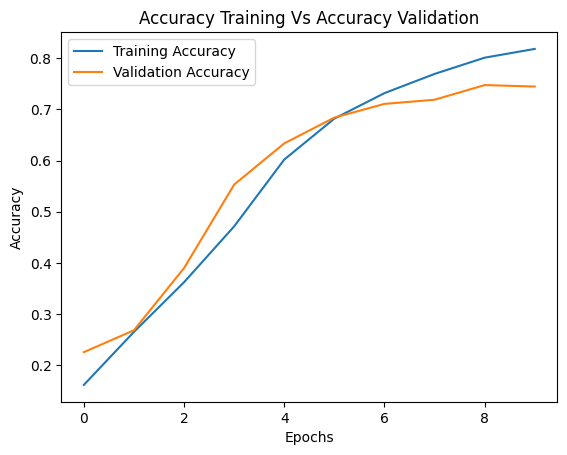

In [13]:
#Plotting the accuracy:
plt.plot(history2.history["accuracy"],label="Training Accuracy")
plt.plot(history2.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Training Vs Accuracy Validation")
plt.legend(loc="best")

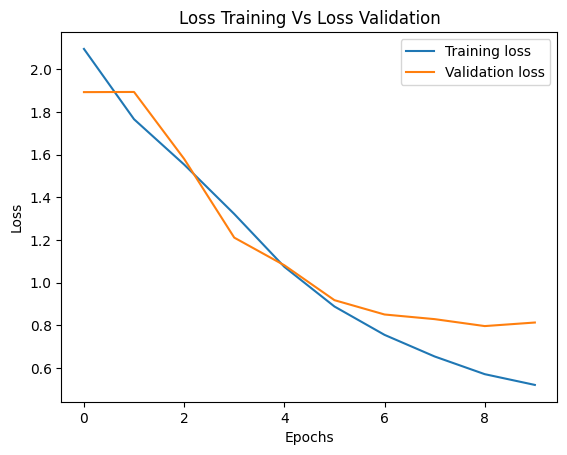

In [14]:
#Plotting the loss:
plt.plot(history2.history["loss"],label="Training loss")
plt.plot(history2.history["val_loss"],label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Training Vs Loss Validation")
plt.legend(loc="best")

In [15]:
model_vgg.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7496 - loss: 0.7995


[0.8134394288063049, 0.7445999979972839]

## MobileNet


In [16]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = True

model_mob = Sequential([
    base_model,
    Conv2D(512, (3,3), padding="same"),
    Conv2D(128, (3,3), padding="same"),
    Conv2D(32, (3,3), padding="same"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model_mob.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Use the correctly preprocessed y_test here for validation data
history3=model_mob.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=126)

/tmp/ipython-input-16-2347908760.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.4970 - loss: 1.4597 - val_accuracy: 0.2539 - val_loss: 8.4349
Epoch 2/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7470 - loss: 0.7751 - val_accuracy: 0.3698 - val_loss: 8.0781
Epoch 3/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7877 - loss: 0.6465 - val_accuracy: 0.4335 - val_loss: 5.0079
Epoch 4/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8124 - loss: 0.5762 - val_accuracy: 0.5621 - val_loss: 3.3814
Epoch 5/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8367 - loss: 0.5012 - val_accuracy: 0.5346 - val_loss: 2.4024
Epoch 6/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8484 - loss: 0.4729 - val_accuracy: 0.6435 - val_loss: 2.6591
Epoch 7/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.8566 - loss: 0.4461 - val_accuracy: 0.5899 - val_loss: 2.8574
Epoch 8/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 11s

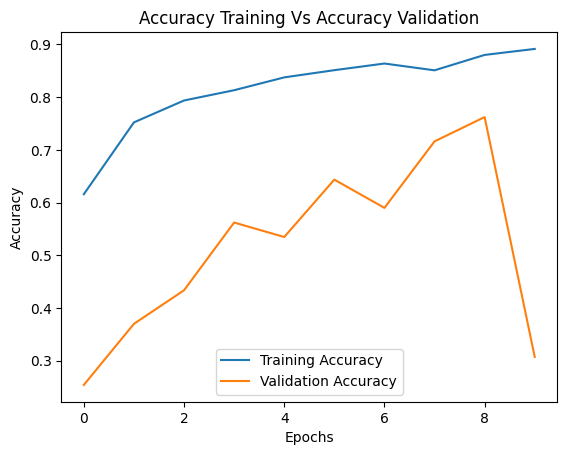

In [18]:
#Plotting the accuracy:
plt.plot(history3.history["accuracy"],label="Training Accuracy")
plt.plot(history3.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Training Vs Accuracy Validation")
plt.legend(loc="best")

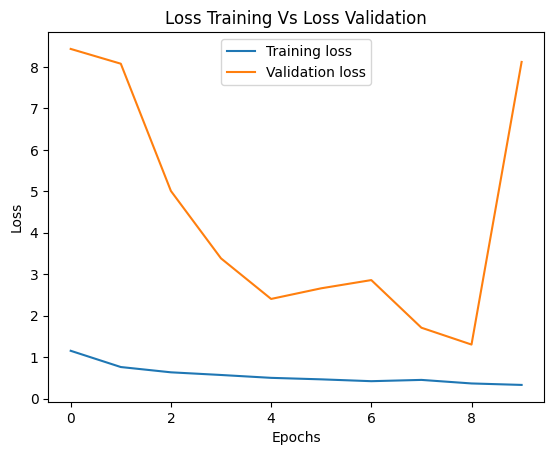

In [20]:
#Plotting the loss:
plt.plot(history3.history["loss"],label="Training loss")
plt.plot(history3.history["val_loss"],label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Training Vs Loss Validation")
plt.legend(loc="best")

In [21]:
model_mob.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.3109 - loss: 8.0699


[8.121087074279785, 0.3070000112056732]

## Resultados

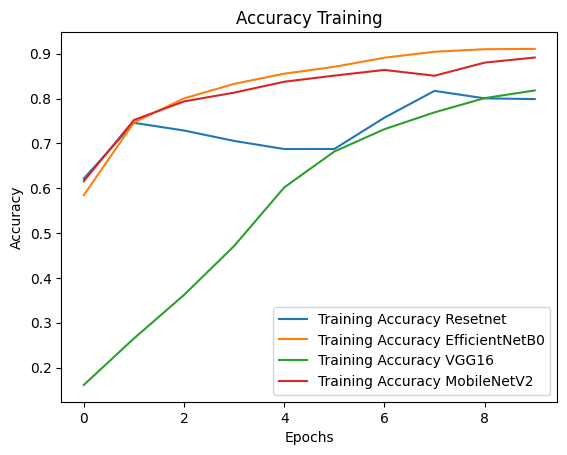

In [24]:
#Viendo diferentes modelos training
plt.plot(history.history["accuracy"],label="Training Accuracy Resetnet")
plt.plot(history1.history["accuracy"],label="Training Accuracy EfficientNetB0")
plt.plot(history2.history["accuracy"],label="Training Accuracy VGG16")
plt.plot(history3.history["accuracy"],label="Training Accuracy MobileNetV2")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Training")
plt.legend(loc="best")
plt.savefig("Accuracy_training.png")

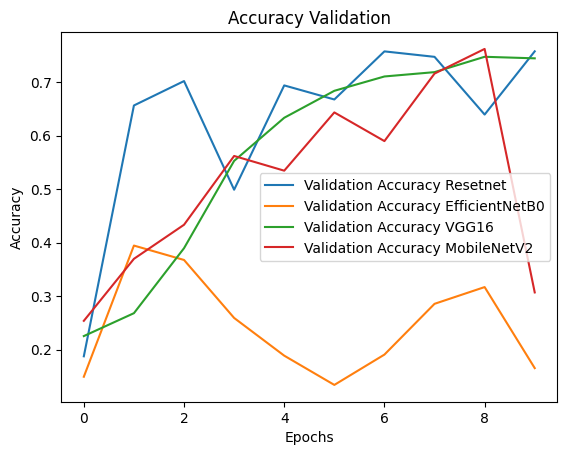

In [25]:
#Viendo diferentes modelos validation
plt.plot(history.history["val_accuracy"],label="Validation Accuracy Resetnet")
plt.plot(history1.history["val_accuracy"],label="Validation Accuracy EfficientNetB0")
plt.plot(history2.history["val_accuracy"],label="Validation Accuracy VGG16")
plt.plot(history3.history["val_accuracy"],label="Validation Accuracy MobileNetV2")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Validation")
plt.legend(loc="best")
plt.savefig("Accuracy_validation.png")

Vemos que los modelos Resnet y VGG16 son modelos confiables tanto en entrenamiento como en validacion.

El model MobileNetV2 quizas necesita mas epocas para converger.

El modelo EfficentNetB0 no logra generalizar y su compartamiento en la validacion es muy pobre.